In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
df = pd.read_csv("austin_weather.csv")  # Replace with your dataset path
print("Dataset shape:", df.shape)
df

Dataset shape: (1319, 21)


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [9]:
# Replace 'T' (trace amount) with 0.0
df.replace("T", 0.0, inplace=True)

# Replace '-' with NaN
df.replace("-", np.nan, inplace=True)

# Convert numeric columns to floats where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Drop irrelevant columns
df.drop(["Date", "Events"], axis=1, inplace=True, errors='ignore')

# Drop rows with missing values
df = df.dropna()
print("Dataset after cleaning:", df.shape)
df

Dataset after cleaning: (1305, 19)


C:\Users\hp\AppData\Local\Temp\ipykernel_1292\3151575879.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1315,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1316,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,0.00
1317,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,0.00


In [24]:
y = df["PrecipitationSumInches"]
X = df.drop("PrecipitationSumInches", axis=1)
print("Features:", list(X.columns))

Features: ['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 'WindGustMPH']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
coefficients

Mean Squared Error: 0.06990247004603678
R² Score: 0.2210609128710802


,Feature,Coefficient
10,SeaLevelPressureAvgInches,0.662865
12,VisibilityHighMiles,0.316382
15,WindHighMPH,0.060240
0,TempHighF,0.030575
2,TempLowF,0.027453
8,HumidityLowPercent,0.014152
3,DewPointHighF,0.010983
5,DewPointLowF,0.010748
6,HumidityHighPercent,0.004834
14,VisibilityLowMiles,-0.005348


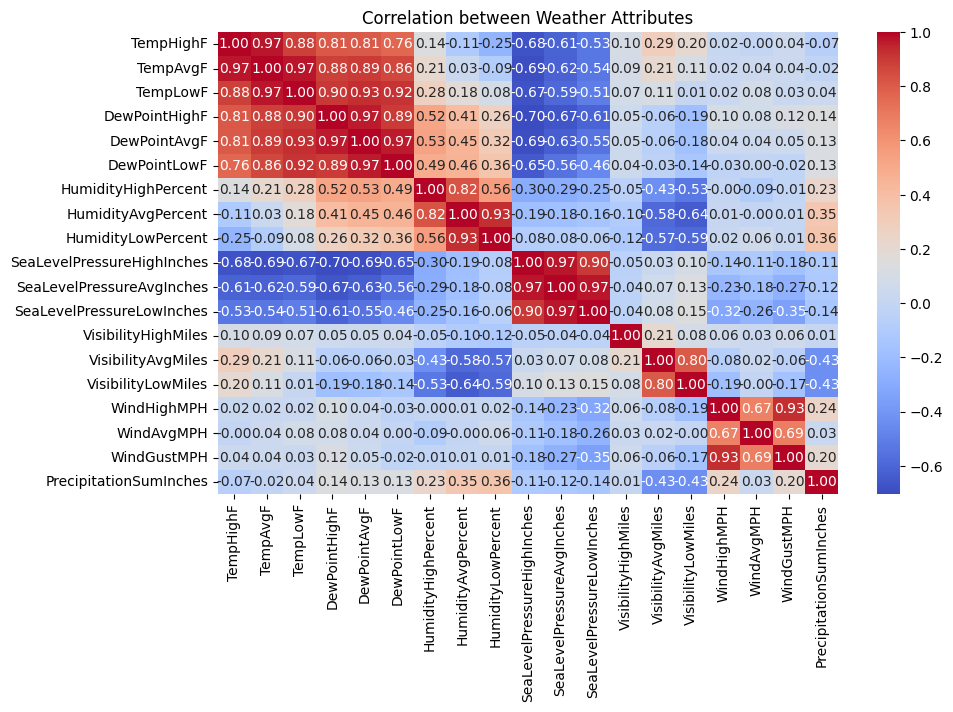

In [28]:
 #Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Weather Attributes")
plt.show()


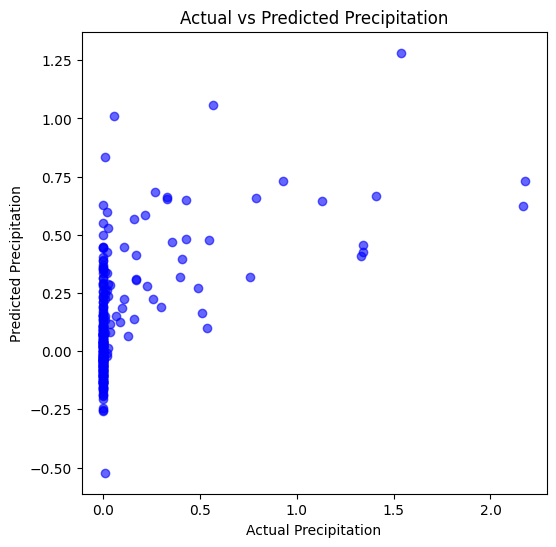

In [29]:
# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.title("Actual vs Predicted Precipitation")
plt.show()

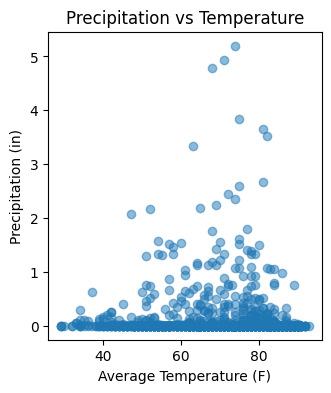

In [30]:
# Precipitation vs Temp, Humidity, Wind
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.scatter(df["TempAvgF"], df["PrecipitationSumInches"], alpha=0.5)
plt.xlabel("Average Temperature (F)")
plt.ylabel("Precipitation (in)")
plt.title("Precipitation vs Temperature")
plt.show()

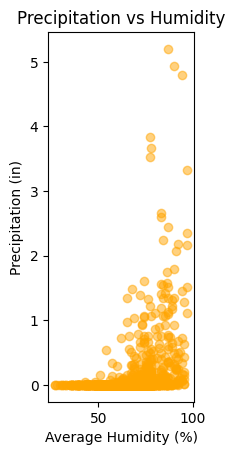

In [31]:
plt.subplot(1,3,2)
plt.scatter(df["HumidityAvgPercent"], df["PrecipitationSumInches"], alpha=0.5, color="orange")
plt.xlabel("Average Humidity (%)")
plt.ylabel("Precipitation (in)")
plt.title("Precipitation vs Humidity")
plt.show()

Text(0.5, 1.0, 'Precipitation vs Wind Speed')

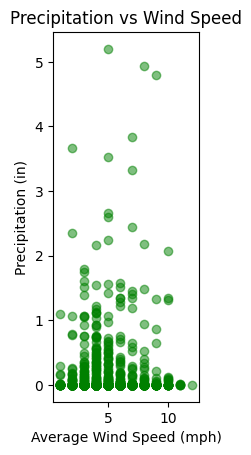

In [32]:
plt.subplot(1,3,3)
plt.scatter(df["WindAvgMPH"], df["PrecipitationSumInches"], alpha=0.5, color="green")
plt.xlabel("Average Wind Speed (mph)")
plt.ylabel("Precipitation (in)")
plt.title("Precipitation vs Wind Speed")